## Foreword

Hi Kagglers!
The score of the House Price predictions project https://www.kaggle.com/godzill22/house-price-predictions/comments I did a year ago it's nothing to be proud of. Over that period I've learnt more interesting techniques that I would like to try and see whether I can impove my model. This notebook is an attempt of systematic approach of how to deal with high dimension dataset and with different features type. I think, the data from House Price competition is ideal to practice those skills. Overall, preparation range anywhere from 60–80% of the total time spent on a Data Science project.

## Load the dataset

In [122]:
import numpy as np
import pandas as pd

import missingno
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import scipy as sp
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [3]:
# Load data desctiption
# with open("/kaggle/input/home-data-for-ml-course/data_description.txt", 'r') as f:
    # print(f.read())

In [4]:
# Load the training dataset
train_df = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# train_df.info()

In [6]:
len(train_df)

1460

In [7]:
train_df[train_df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [8]:
train_missing = train_df.isna().sum()

train_missing = 100 * (train_missing[train_missing > 0] / len(train_df))
train_missing

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [9]:
# Load the test dataset
test_df = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
#test_df.info()

In [11]:
test_df[test_df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [12]:
test_missing = test_df.isna().sum()

test_missing = 100 * (test_missing[test_missing > 0] / len(test_df))
test_missing

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

### Check target column first

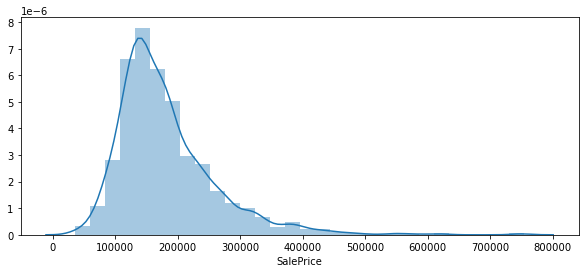

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
sns.distplot(train_df['SalePrice'], bins=30, kde=True, ax=ax)

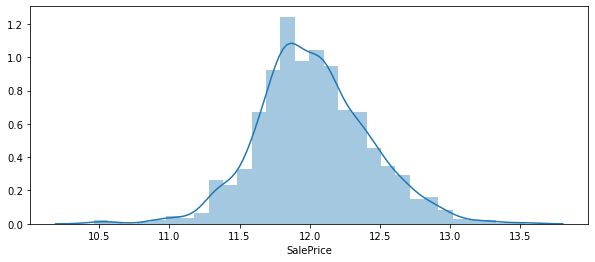

In [14]:
# One way of doing it
fig, ax = plt.subplots(figsize=(10,4))
sns.distplot(np.log1p(train_df['SalePrice']), bins=30, kde=True, ax=ax);
# Perform log transformation 
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

In [15]:
train_df['SalePrice'].isna().sum()

0

First of all I will concatenate these 2 dataframe for feature engineering. It will help me to avoid a problem where train and test dataset discrete features are different from each other.

In [16]:
# Concatenate train/test datasets
df = pd.concat([train_df, test_df], axis=0)

## Numerical Features

In [17]:
# Change these features into object type
change_type = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

for col in change_type:
    df[col] = df[col].astype("object")

In [18]:
# Describe numeric columns
df.drop("Id", axis=1).describe(include=['number']).T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2433.0,69.305795,23.344905,21.000000,59.000000,68.000000,80.000000,313.000000
LotArea,2919.0,10168.114080,7886.996359,1300.000000,7478.000000,9453.000000,11570.000000,215245.000000
MasVnrArea,2896.0,102.201312,179.334253,0.000000,0.000000,0.000000,164.000000,1600.000000
BsmtFinSF1,2918.0,441.423235,455.610826,0.000000,0.000000,368.500000,733.000000,5644.000000
BsmtFinSF2,2918.0,49.582248,169.205611,0.000000,0.000000,0.000000,0.000000,1526.000000
BsmtUnfSF,2918.0,560.772104,439.543659,0.000000,220.000000,467.000000,805.500000,2336.000000
TotalBsmtSF,2918.0,1051.777587,440.766258,0.000000,793.000000,989.500000,1302.000000,6110.000000
1stFlrSF,2919.0,1159.581706,392.362079,334.000000,876.000000,1082.000000,1387.500000,5095.000000
2ndFlrSF,2919.0,336.483727,428.701456,0.000000,0.000000,0.000000,704.000000,2065.000000
LowQualFinSF,2919.0,4.694416,46.396825,0.000000,0.000000,0.000000,0.000000,1064.000000


In [19]:
num_feat = [x for x in df.columns if df[x].dtype !="object"]

num_feat.remove("Id")

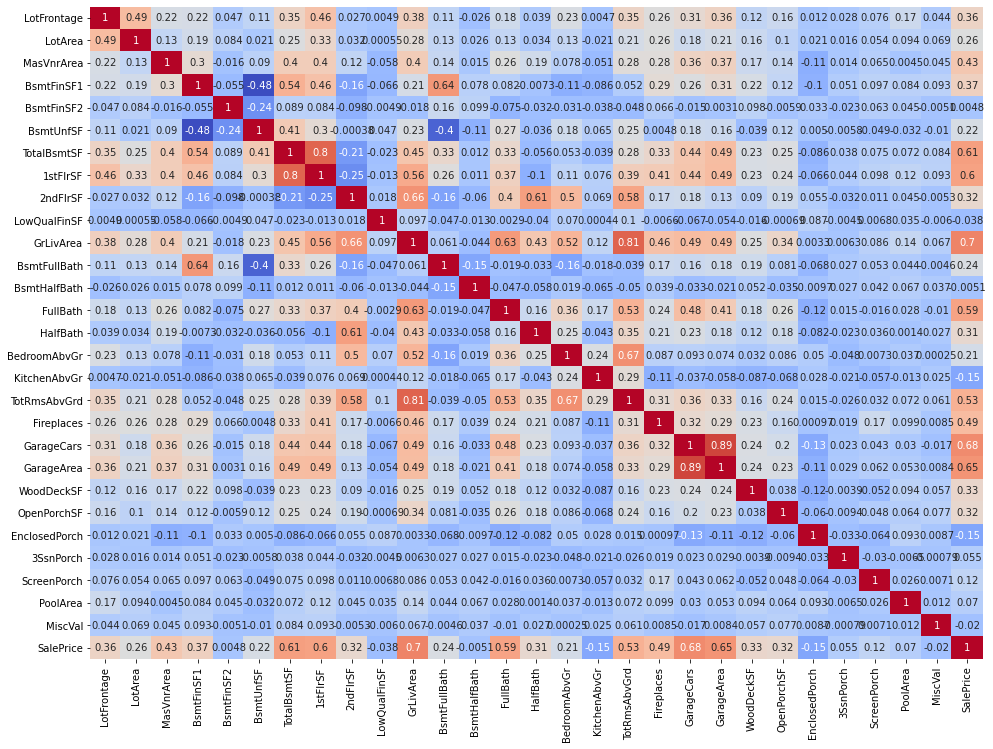

In [20]:
# Correlation between numerical variables
corr_matrix = df[num_feat].corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix.T, annot=True, cbar=False, cmap='coolwarm');

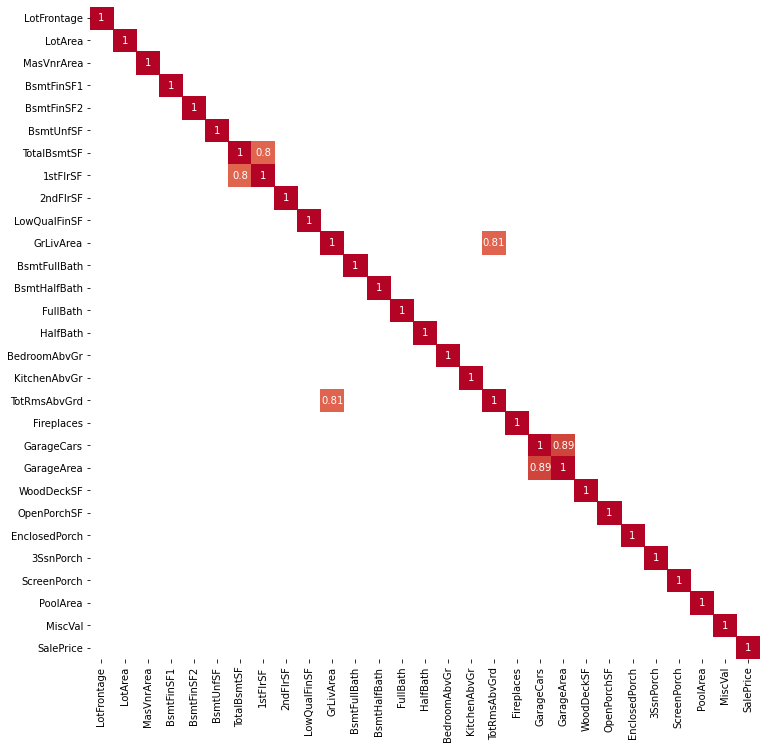

In [21]:
# Correlated variables greater than 0.8
corr_matrix = df[num_feat].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix.T, annot=True, mask= corr_matrix < 0.8 ,cbar=False, cmap='coolwarm');

Let's check how these correlated variables to each other are correlated to the target column, so I can decide which of them remove from further analysis.

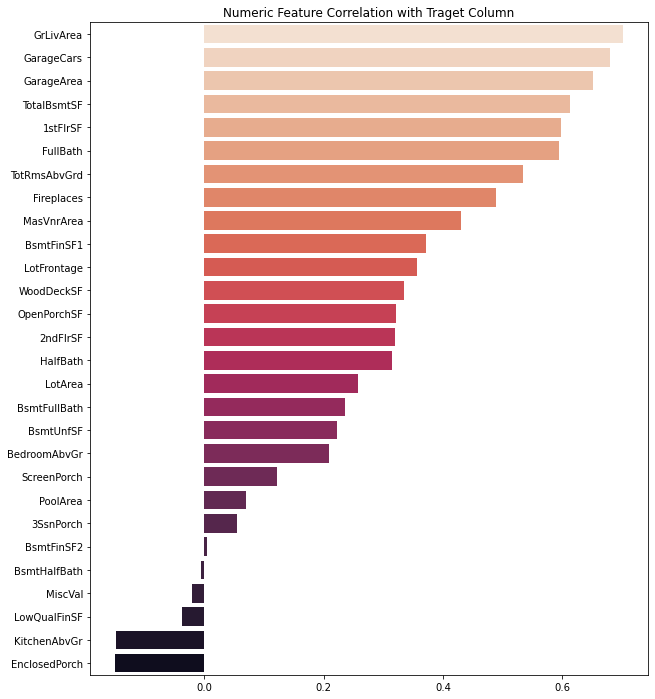

In [22]:
price_corr_ser = df[num_feat].corr()['SalePrice']
price_corr_ser = price_corr_ser.sort_values(ascending=False)
price_corr_ser = price_corr_ser.drop("SalePrice")

fig, ax = plt.subplots(figsize=(10,12))
sns.barplot(x=price_corr_ser.values, y=price_corr_ser.index, palette="rocket_r")
plt.title("Numeric Feature Correlation with Traget Column");

In [23]:
# Remove one of the highly correlated variables
high_correlated_var = ["GarageArea",'1stFlrSF','TotRmsAbvGrd']
df = df.drop(high_correlated_var, axis=1)

# Remove it from list of numeric columns
for c in high_correlated_var:
    num_feat.remove(c)

### Distribution of numeric features

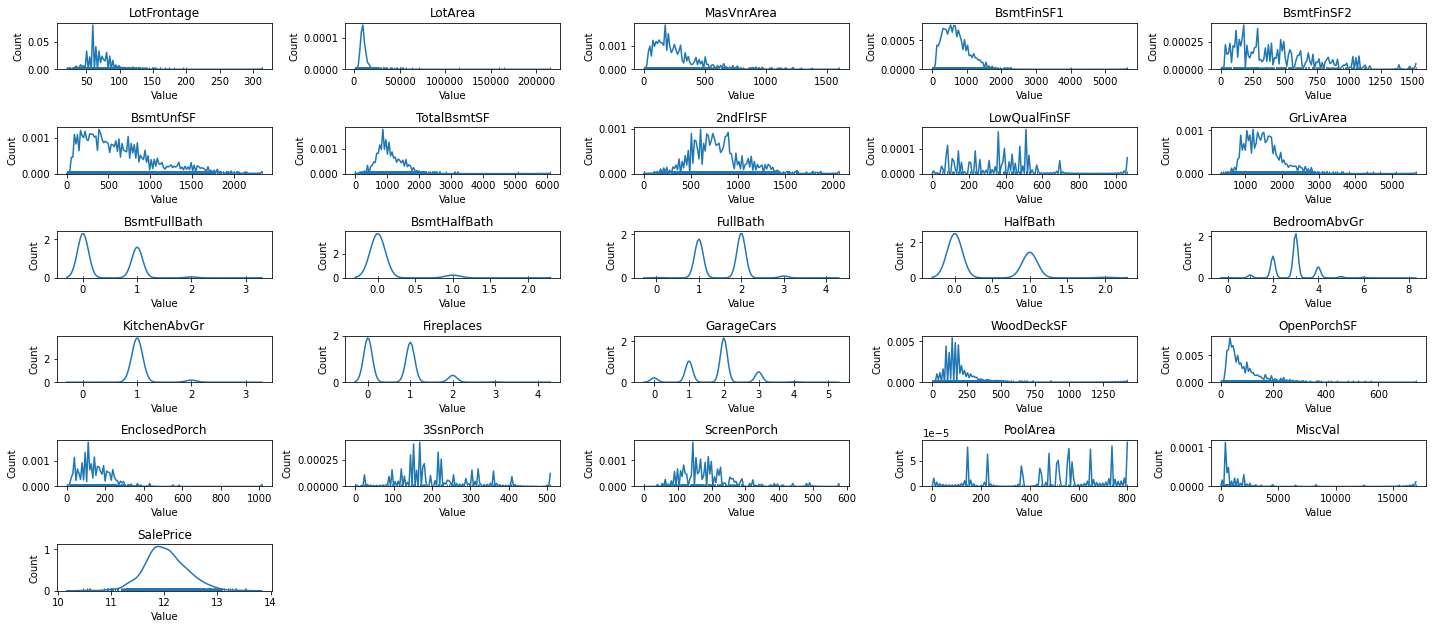

In [24]:
# Plot distribution of numeric variables
fig = plt.figure(figsize=(20,20))

for i in range(len(num_feat)):
    plt.subplot(14,5, i+1)
    sns.distplot(df[num_feat[i]], rug=True, hist=False, kde_kws={'bw':0.1})
    plt.title(num_feat[i])
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.tight_layout()
fig.show()

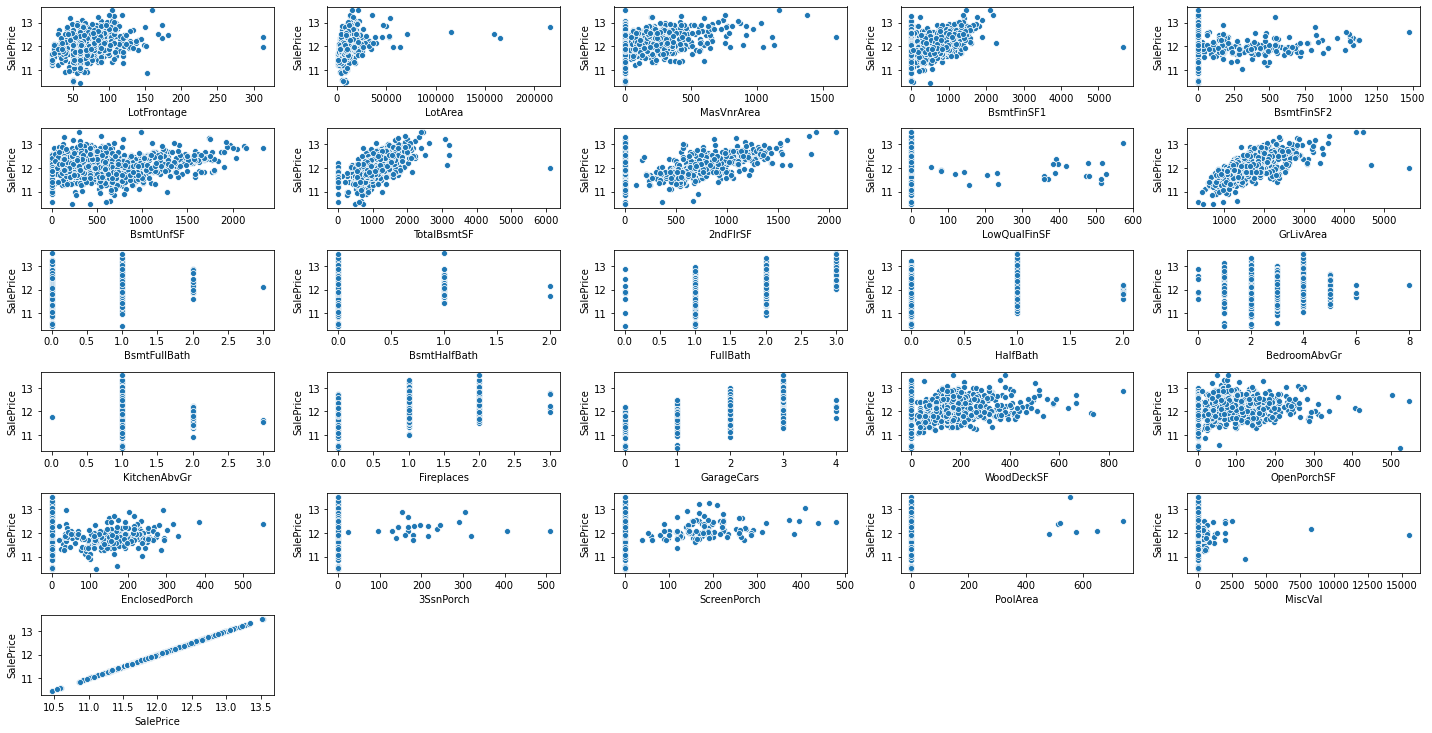

In [25]:
# Visualize relation between numeric features and target column
fig = plt.figure(figsize=(20,20))
# numeric_df = num_df.drop('SalePrice', axis=1)

for i, col in enumerate(df[num_feat].columns):
    plt.subplot(12,5, i+1)
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.tight_layout()
    
fig.show()

### Numerical outliers

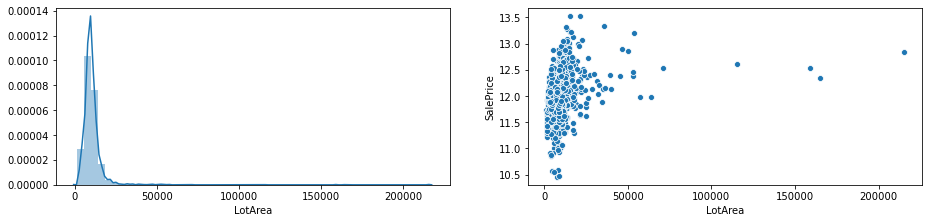

In [26]:
fig = plt.figure(figsize=(24,15))

plt.subplot(4,3,1)
sns.distplot(df["LotArea"])

plt.subplot(4,3,2)
sns.scatterplot(x="LotArea", y="SalePrice", data=df)

In [27]:
df["LotArea"].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

I will remove outliers from this continues numeric column later on as it would effect my test dataset for submission if I do it now.

**PoolArea**

In [28]:
# Create binary column 1 if the house has a pool, 0 if not
df['isPool'] = df['PoolArea'].apply(lambda x: 0 if x == 0 else 1)
df['isPool'] = df['isPool'].astype("object")
df = df.drop('PoolArea',axis=1)
num_feat.remove("PoolArea")

**totalPorch**

In [29]:
# create a new column where I concatenate all Porch columns
porch_col = ['OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch']

df['totalPorch'] = np.zeros(len(df)).reshape(len(df),1)

for col in porch_col:
    df['totalPorch'] += df[col]
    
# Remove porch col from dataset
for c in porch_col:
    df.drop(c, axis=1, inplace=True)

# Remove it from the list of numerical columns
to_remove = ["OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]
for c in to_remove:
    num_feat.remove(c)

# Add column to the list of numeric
num_feat.append("totalPorch")

**Bathroom columns**

In [30]:
# Create new columns and drop relevant ones
df["TotBathAbvGrade"] = df["FullBath"] + (0.5 * df["HalfBath"])
df["TotBsmtBath"] = df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"])

# Remove columns
to_remove = ["FullBath","HalfBath","BsmtFullBath", "BsmtHalfBath"]

for col in to_remove:
    df.drop(col, axis=1, inplace=True)
    num_feat.remove(col)

# Append new ones to the numeric columns
num_feat.append("TotBathAbvGrade")
num_feat.append("TotBsmtBath")

Columns LotFrontage(Linear feet of street connected to property) and LotArea(Lot size in square feet) are highly correlated, so I will drop feature with missing values.

In [31]:
# Remove useless numerical column
df.drop("LotFrontage", axis=1, inplace=True)
num_feat.remove("LotFrontage")

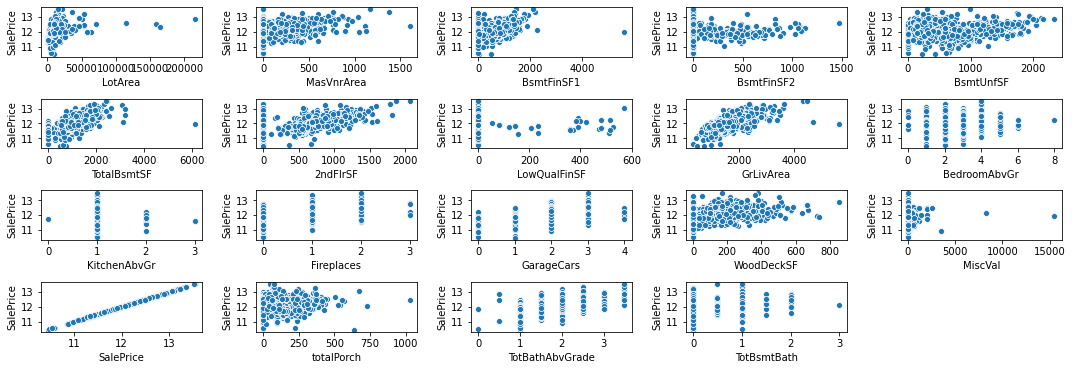

In [32]:
# Create a plot again
fig = plt.figure(figsize=(15,15))

for i, col in enumerate(num_feat):
    plt.subplot(12,5, i+1)
    sns.scatterplot(x=df[col], y='SalePrice', data=df)
    plt.tight_layout()

fig.show()

### Missing values in numeric features

The only numerical column left with some missing values (less than 1%) so I will fill them with a mean of the column. I don't need to fill missing values in SalePrice Columns.

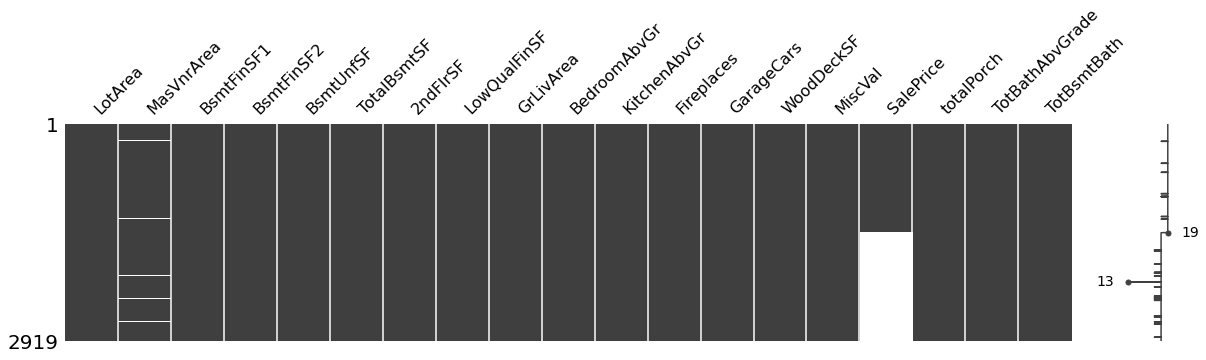

In [33]:
# Show missing values
missingno.matrix(df[num_feat], figsize=(20,4))

In [34]:
# Remove SalePrice temporary
num_feat.remove("SalePrice")

In [35]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df[num_feat])
df[num_feat] = imp.transform(df[num_feat])

In [36]:
for col in df[num_feat]:
    df[col] = df[col].apply(lambda x: np.log1p(x))
    
# Append SalePrice back to numeric columns
num_feat.append("SalePrice")

## Categorical features

#### Missing Values in Categorical

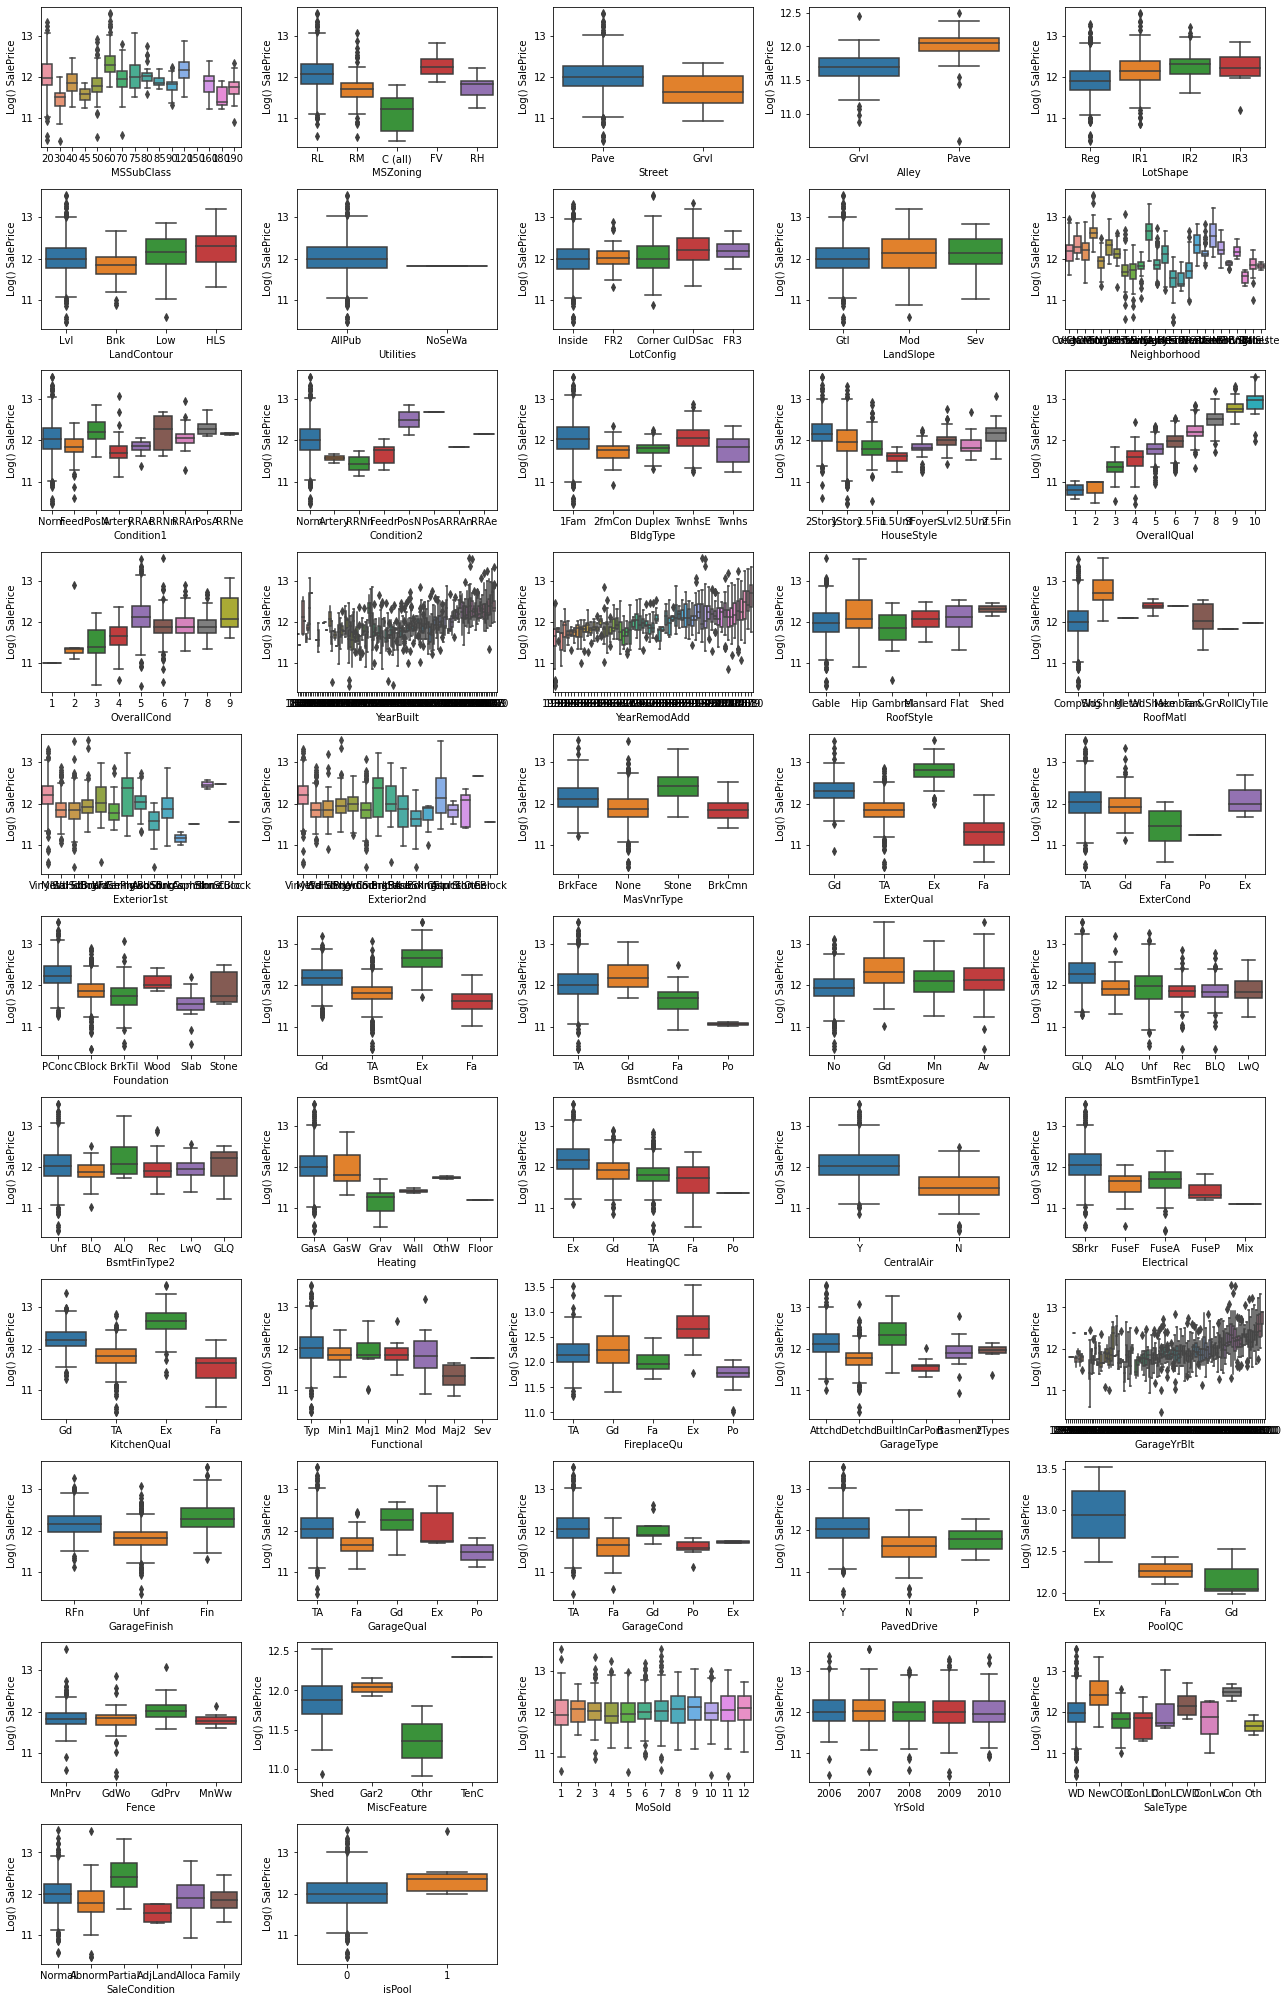

In [37]:
# List of categorical columns
cat_feat = [x for x in df.columns if df[x].dtype == "object"]

# Create a multi plot with categorical features
fig = plt.figure(figsize=(18, 30))

for i , col in enumerate(cat_feat):
    plt.subplot(12,5, i+1)
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.ylabel("Log() SalePrice")
    plt.tight_layout()
    
fig.show()

There are some features that are useless(to many variables or the same information). First, I will try to create new features from them.

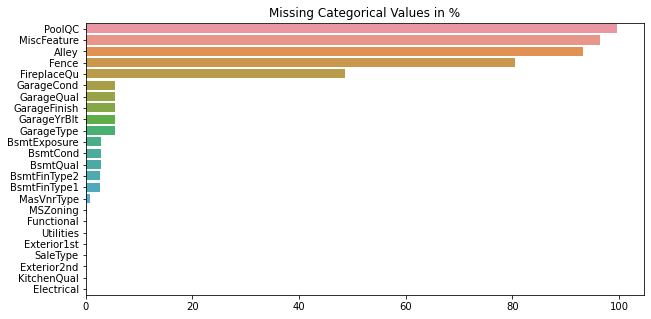

In [38]:
cat_missing = df[cat_feat].isna().sum()

cat_missing = 100 * (cat_missing[cat_missing > 0] / len(df[cat_feat]))

plt.figure(figsize=(10,5))
sns.barplot(x= cat_missing.sort_values(ascending=False).values, y= cat_missing.sort_values(ascending=False).index)
plt.title("Missing Categorical Values in %");

#### Missing data in categorical columns

There are many methods to impute data, some of them are very sophisticated, but there is one flaw, we impute artificially created values. In case of categorical variables imputing mode of a column could be one of them, but I will fill missing values with a string "None" so I could retain the orginal information.

In [39]:
# Fill missing values in categorical columns with a string
for col in cat_feat:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(value="NA")
    else:
        continue

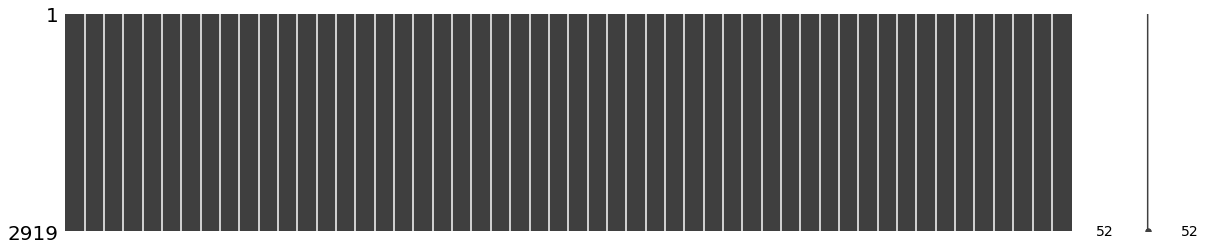

In [40]:
missingno.matrix(df[cat_feat], figsize=(20,4))

In [41]:
# for col in cat_missing.columns:
    # print(f" Column '{col}' has unique values {df[col].unique()}")

In [42]:
cat_missing = df[cat_feat].isna().sum()

cat_missing = 100 * (cat_missing[cat_missing > 0] / len(df[cat_feat]))

cat_missing

Series([], dtype: float64)

### Feature engineering for categorical variables

**GarageYrBlt column**

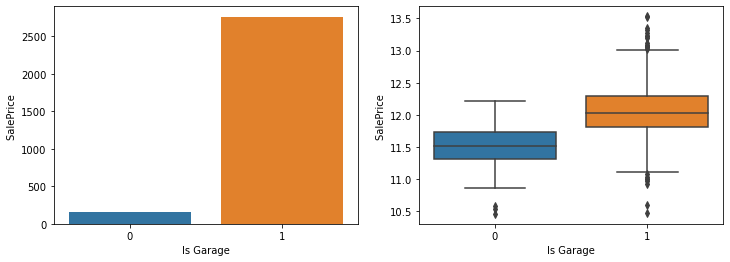

In [43]:
# Creating new series 
is_garage = df['GarageYrBlt'].apply(lambda x: 1 if x != "NA" else 0)

# Plot new series
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

sns.countplot(is_garage, ax=axes[0])
sns.boxplot(x=is_garage.values, y='SalePrice', data=df, ax=axes[1])

axes[0].set_xlabel("Is Garage")
axes[0].set_ylabel("SalePrice ")

axes[1].set_xlabel("Is Garage")
axes[1].set_ylabel("SalePrice ");

In [44]:
to_remove = []
# Add to the list of columns to remove
to_remove.append("GarageYrBlt")

# Create new column from GaragYrBlt
df['isGarage'] = is_garage.astype('object')
cat_feat.append("isGarage")

**YearRemodAdd column**

In [45]:
df['YearRemodAdd'].unique()
to_remove.append("YearRemodAdd")

I don't see any value from this column, therefore I will drop it later on.

**YearBuilt & YrSold columns**

In [46]:
# Create a series of how old a house was when sold
how_old = (df['YrSold'].astype(int) - df['YearBuilt'].astype(int))

# New column from 
df['Old_in_Years'] = pd.Series(how_old)
# Update to numertic list
num_feat.append("Old_in_Years")

# Add columns for remove
to_remove.append('YrSold')
to_remove.append('YearBuilt')

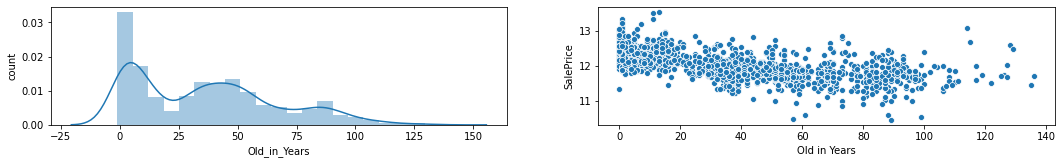

In [47]:
fig = plt.figure(figsize=(18,10))

# Distribution of new column
plt.subplot(4,2, 1)
sns.distplot(df['Old_in_Years'])
plt.ylabel("count")

# Scatterplot of new column
plt.subplot(4,2, 2)
sns.scatterplot(x=df['Old_in_Years'].values, y='SalePrice', data=df)

# Labels
plt.xlabel("Old in Years")
plt.ylabel("SalePrice");

I'm not sure if creating another column from two old ones will improve my model or it will carry the same information as newly created numerical one? If someone can clear that for me that would be great. For now I won't create it.

In [48]:
to_remove

['GarageYrBlt', 'YearRemodAdd', 'YrSold', 'YearBuilt']

**Condition1 & Condition2 columns**

In [49]:
df['Condition1'].value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [50]:
df['Condition2'].value_counts()

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

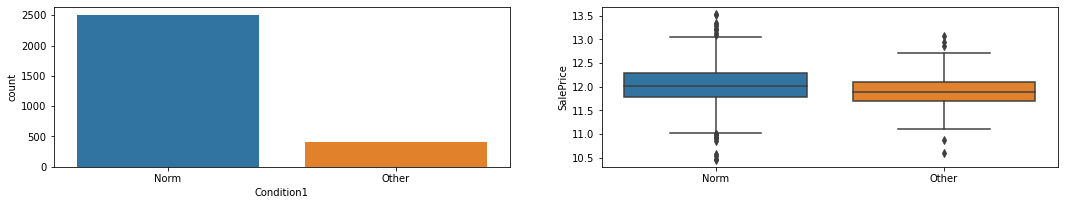

In [51]:
fig = plt.figure(figsize=(18,10))

condition1 = df['Condition1'].apply(lambda x: x if x == "Norm" else "Other")

plt.subplot(3,2, 1)
sns.countplot(condition1)

plt.subplot(3,2, 2)
sns.boxplot(x=condition1.values, y='SalePrice', data=df);

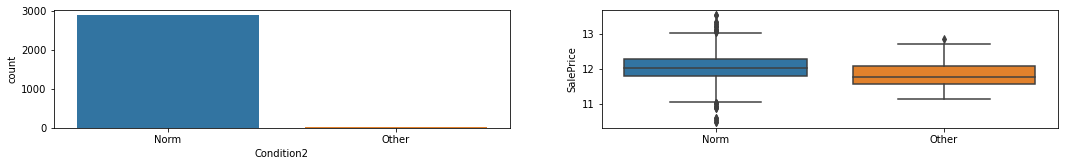

In [52]:
fig = plt.figure(figsize=(18,10))

condition2 = df['Condition2'].apply(lambda x: x if x == "Norm" else "Other")

plt.subplot(4,2, 1)
sns.countplot(condition2)

plt.subplot(4,2,2)
sns.boxplot(x=condition2.values, y='SalePrice', data=df);

I think, that the only reason doing it is to reduce dimensionality of our dataframe. I am going to to keep these columns in unchange form now.

### Nominal and Ordinal Columns

Some of the categorical columns have nominal or ordinal values and that needs to be addressed. As a remminder, nominal data is when we can only classify the data, while ordinal data can be classified and ordered.

**Ordinal values**

In [53]:
ordinal_feat = ['OverallQual','OverallCond','ExterQual','ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1',
               'BsmtFinType2','HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual','GarageCond','PoolQC']

df['BsmtExposure'] = df['BsmtExposure'].apply(lambda x: x if x !='No' else "NA")

for col in ordinal_feat:
    # Remove ordinal from list  
    cat_feat.remove(col)
        
    print(f" Column '{col}' has unique values {df[col].unique()}")

 Column 'OverallQual' has unique values [7 6 8 5 9 4 10 3 1 2]
 Column 'OverallCond' has unique values [5 8 6 7 4 2 3 9 1]
 Column 'ExterQual' has unique values ['Gd' 'TA' 'Ex' 'Fa']
 Column 'ExterCond' has unique values ['TA' 'Gd' 'Fa' 'Po' 'Ex']
 Column 'BsmtQual' has unique values ['Gd' 'TA' 'Ex' 'NA' 'Fa']
 Column 'BsmtCond' has unique values ['TA' 'Gd' 'NA' 'Fa' 'Po']
 Column 'BsmtExposure' has unique values ['NA' 'Gd' 'Mn' 'Av']
 Column 'BsmtFinType1' has unique values ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
 Column 'BsmtFinType2' has unique values ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']
 Column 'HeatingQC' has unique values ['Ex' 'Gd' 'TA' 'Fa' 'Po']
 Column 'KitchenQual' has unique values ['Gd' 'TA' 'Ex' 'Fa' 'NA']
 Column 'FireplaceQu' has unique values ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
 Column 'GarageQual' has unique values ['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
 Column 'GarageCond' has unique values ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']
 Column 'PoolQC' has unique values ['NA' 'Ex' '

In [54]:
# Map ordinal columns and change their type
ord_map = {"NA":0, "Po":1, "Fa":2, "TA":3, "Gd":4,"Ex":5}
ord_map1 = {"NA":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}
ord_map2 = {"NA":0, "No":1, "Mn":2, "Av":3, "Gd":4}

for col in ordinal_feat:
        
    if len(df[col].unique()) <= 6 and col !="BsmtExposure":
        df[col] = df[col].map(ord_map)
        df[col] = df[col].astype(int)
        
    elif col in ['OverallQual', 'OverallCond']:
        df[col] = df[col].astype(int)
        
    elif df[col].name in ['BsmtFinType1', 'BsmtFinType2']:
        df[col] = df[col].map(ord_map1)
        df[col] = df[col].astype(int)
        
    else:
        df[col] = df[col].map(ord_map2) 
        df[col] = df[col].astype(int)
        
for col in ordinal_feat:
    # Append nominal features to the numerical features
    num_feat.append(col)
    print(f" Column '{col}' has unique values :{df[col].unique()}, dtype: {df[col].dtypes}")
    

 Column 'OverallQual' has unique values :[ 7  6  8  5  9  4 10  3  1  2], dtype: int64
 Column 'OverallCond' has unique values :[5 8 6 7 4 2 3 9 1], dtype: int64
 Column 'ExterQual' has unique values :[4 3 5 2], dtype: int64
 Column 'ExterCond' has unique values :[3 4 2 1 5], dtype: int64
 Column 'BsmtQual' has unique values :[4 3 5 0 2], dtype: int64
 Column 'BsmtCond' has unique values :[3 4 0 2 1], dtype: int64
 Column 'BsmtExposure' has unique values :[0 4 2 3], dtype: int64
 Column 'BsmtFinType1' has unique values :[6 5 1 3 4 0 2], dtype: int64
 Column 'BsmtFinType2' has unique values :[1 4 0 5 3 2 6], dtype: int64
 Column 'HeatingQC' has unique values :[5 4 3 2 1], dtype: int64
 Column 'KitchenQual' has unique values :[4 3 5 2 0], dtype: int64
 Column 'FireplaceQu' has unique values :[0 3 4 2 5 1], dtype: int64
 Column 'GarageQual' has unique values :[3 2 4 0 5 1], dtype: int64
 Column 'GarageCond' has unique values :[3 2 0 4 1 5], dtype: int64
 Column 'PoolQC' has unique values 

In [55]:
# Let's remove some categorical columns we do not need anymore
for col in to_remove:
    df.drop(col, axis=1, inplace=True)
    cat_feat.remove(col)

####  Check numerical features correlation again

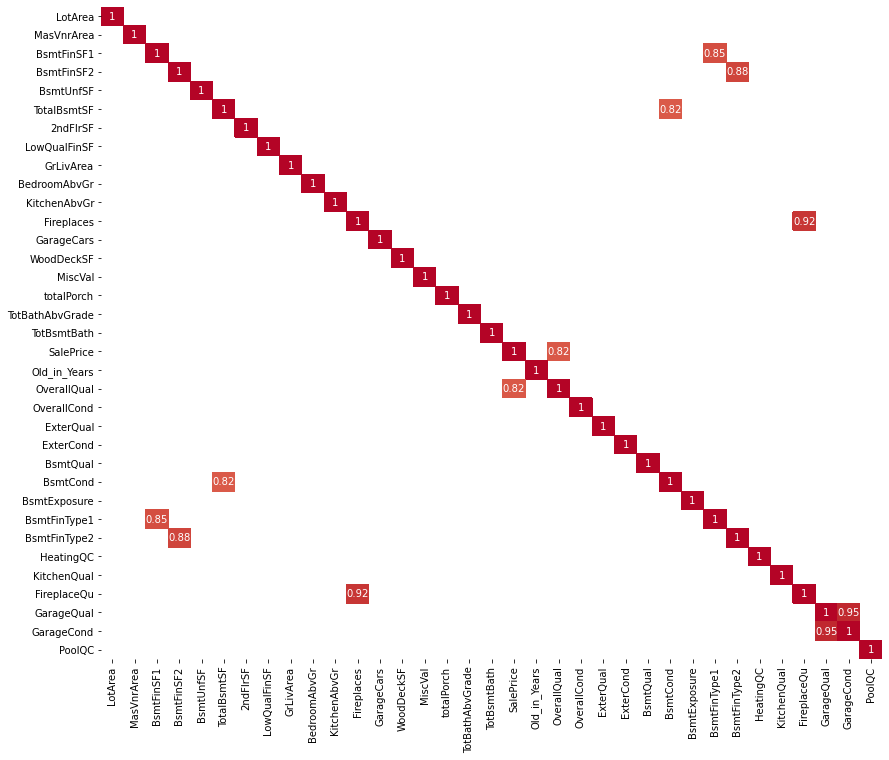

In [56]:
plt.figure(figsize=(14,12))

sns.heatmap(df[num_feat].corr(), mask= df[num_feat].corr()  < 0.8 , cbar=False, cmap='coolwarm', annot=True);

I introduce correlation between features when I converted some ordinal features and I need to remove one of the correlated feature. There is also high correlation between "SalePrice" and "OverallQual" (0.817185) but this is all right.

In [57]:
corr_to_remove = ['GarageCond', 'FireplaceQu', 'BsmtFinType1','BsmtFinType2','BsmtCond',]

for col in corr_to_remove:
    df = df.drop(col, axis=1)
    num_feat.remove(col)
    ordinal_feat.remove(col)

**Nominal values**

Different methods can be apply to convert nominal variables into numbers so I future algorithm can work with them. All of them have prons and cons but I am not going to write about it here. One of the simpliest and easy to understand is pandas "get_dummies" method, however you need to remember not to indroduce nulticollinearity what is also called (dummy trap). 

In [58]:
# Create dummy variables 
dummy_df = pd.get_dummies(df[cat_feat], drop_first=True)

for col in cat_feat:
    df.drop(col, axis=1, inplace=True)
    
df_with_dummies = pd.concat([df, dummy_df], axis=1)

Second method for converting nominal categorical variables is OneHotEncode, but I am not going to use it in this notebook. Another common method used by practitioners is Label Encoding which suits more with variables who have some sort of order. 

**Now, this is very important that we split dataset back into test and train dataset before we scale the data.**

In [59]:
# Split dataframe into test/train dataset
clean_train_df = df_with_dummies[df_with_dummies["SalePrice"] > 0].copy()
clean_test_df = df_with_dummies[df_with_dummies["SalePrice"].isna()].copy()

# Drop SalePrice column from test set
clean_test_df.drop("SalePrice", axis=1, inplace=True)

In [60]:
clean_test_df.shape, clean_train_df.shape

((1459, 233), (1460, 234))

**Skewness**

In [61]:
skewed_features = clean_train_df[num_feat].skew().sort_values(ascending=False)
skewed_features = skewed_features[skewed_features > 0.5]
skewed_index = skewed_features.index

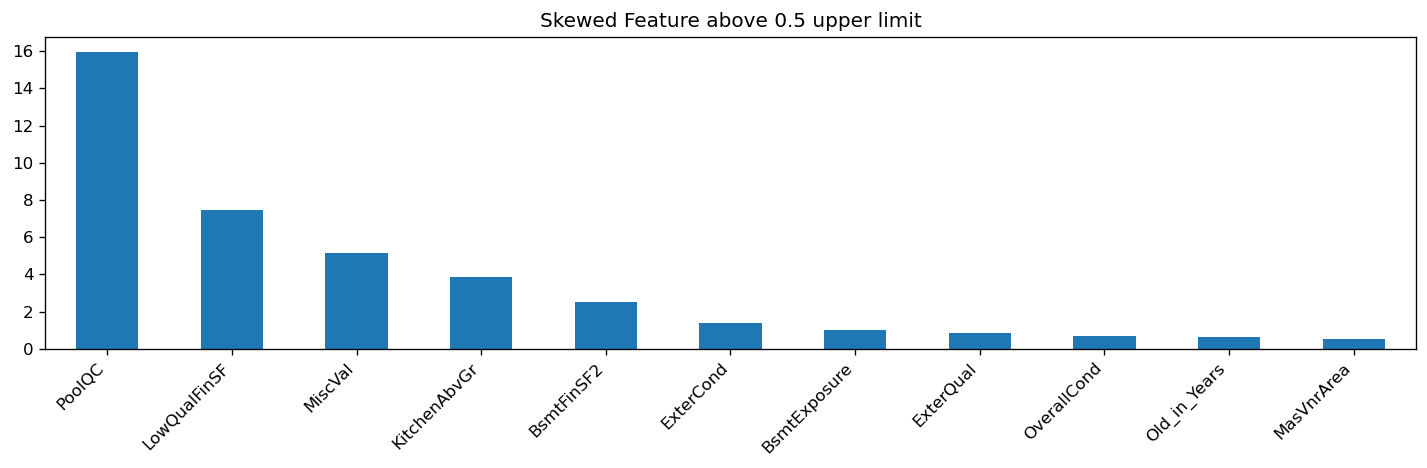

In [62]:
fig = plt.figure(figsize=(12,4), dpi=120)
skewed_features.sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45)
plt.xticks(horizontalalignment="right")
plt.title("Skewed Feature above 0.5 upper limit")
plt.tight_layout();

First of all I will remove highly skewed features from dataset and then trim off the rest of them by 0.5 limit. Acceptable values for skewness are between -0.5 and 0.5 while -2 and 2 for Kurtosis.

In [63]:
right_skewness_col = ['PoolQC', 'LowQualFinSF']
for col in right_skewness_col:
    clean_train_df.drop(col, axis=1, inplace=True)
    clean_test_df.drop(col, axis=1, inplace= True)
    num_feat.remove(col)

In [64]:
skewed_index = skewed_index.drop(['PoolQC','LowQualFinSF'])

In [65]:
for col in skewed_index:
    q3 = np.quantile(clean_train_df[col], 0.75)
    q1 = np.quantile(clean_train_df[col], 0.25)
    iqr = q3 - q1
    # Upper limit for outliers
    upper_limit = q3 + (1.5*iqr)
    col_limit =  clean_train_df[col].apply(lambda x: x <= upper_limit)
    clean_train_df = clean_train_df[col_limit]

In [66]:
clean_train_df.shape

(1031, 232)

In [67]:
# Save id column for submission
row_id = pd.Series(clean_test_df["Id"])
clean_train_df = clean_train_df.drop("Id", axis=1).astype("float64")
clean_test_df = clean_test_df.drop("Id", axis=1).astype("float64")

## Splitting and standarization of the data

In [68]:
from sklearn.model_selection import train_test_split

# Split training dataset into X/y first
X = clean_train_df.drop(["SalePrice"], axis=1)
y = clean_train_df['SalePrice']

# Then, split it into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

We all know how important is to standarize/normalize dataset for our algorithms but there are exceptions depend on what algorithm we are going to use. In order to do it right we need to remember about few things. Some suggest that it only descrete variables should be standarized and definitely we have to fit and transform train set and then only transforming test set. The reason for that we are not creating what is known as data leakage.

In [69]:
num_feat.remove('SalePrice')

In [70]:
from sklearn.preprocessing import StandardScaler
scaled_Xtrain = X_train.copy()
scaled_Xtest = X_test.copy()

scaler = StandardScaler()

scaled_Xtrain[num_feat] = scaler.fit_transform(scaled_Xtrain[num_feat])
scaled_Xtest[num_feat] = scaler.transform(scaled_Xtest[num_feat])

In [71]:
scaled_Xtrain.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,isPool_1,isGarage_1
205,0.576261,0.503372,-0.362479,-0.870245,-0.806544,0.161716,0.427310,-0.67239,-1.353870,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1434,1.321359,-0.895543,-0.362479,-0.870245,-0.806544,0.161716,-0.754245,-0.67239,0.880910,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
773,0.275677,-0.895543,-0.362479,-0.611210,-0.806544,0.161716,-0.754245,-0.67239,0.646415,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
411,2.657768,-0.895543,-0.362479,-0.870245,-0.806544,0.161716,-0.754245,0.67076,0.920267,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
817,0.794937,1.202829,-0.362479,0.999773,0.880239,0.161716,0.427310,-0.67239,0.966838,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Creating and testing our models


### Models score baseline

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# Create function for model evaluation
def model_evaluation(algo,algoname):
    """
    This function  fit and  evaluate 
    given algorithm. It takes 3 arguments:
    
    First: algorithm of a choice without parentheses.
    Second: the name of a algorithm as a string.
    """

    # Fit given model
    algo.fit(scaled_Xtrain, y_train)
    y_pred = algo.predict(scaled_Xtest)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # R-squared 
    r2score = r2_score(y_test, y_pred)
    
    print(f"**{algoname} Metrics**")
    print(f"**MAE: {mae:}")
    print(f"**RMSE: {rmse:}")
    print(f"**R-squared: {r2score:.2f}%")
    
    return mae, rmse, r2score, y_pred, algo

Great place to start for someone who ask what algorithm I shoud use is sklearn algorithm cheat-sheet https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html. Follow their recommendation I am going to choose first Stochastic Gradient Descent. Let's create Stochastic Gradient Descent first.

**SGDRegressor**

In [73]:
# Create a base model
from sklearn.linear_model import SGDRegressor

sgd_base_model = SGDRegressor(random_state=101)

sgd_base_mae, sgd_base_rmse, sgd_base_r2score, sgd_y_pred, _ = model_evaluation(sgd_base_model, 
                                                                                "SGDRegressor")

**SGDRegressor Metrics**
**MAE: 0.20417990998934443
**RMSE: 0.3010480014227049
**R-squared: 0.51%


In [74]:
def plot_residuals(y_pred, algoname):
    """
    Function plots probability and residuals plot
    """
    residuals = pd.Series(y_test - y_pred, 
                          name="residuals")
    
    fig, axes = plt.subplots(ncols=2, 
                             nrows=2, 
                             figsize=(14,4), 
                             dpi=120)
    # Plot probability
    sp.stats.probplot(residuals, plot=axes[0,0])
    # Plot kde
    sns.distplot(residuals, ax=axes[0,1], hist=False)
    # Plot residuals
    sns.scatterplot(x=y_test, y=residuals, ax=axes[1,0])
    axes[1,0].axhline(y=0, c='red',ls='--')
    # Plot distribution
    sns.boxplot(residuals, ax=axes[1,1])
    plt.tight_layout()

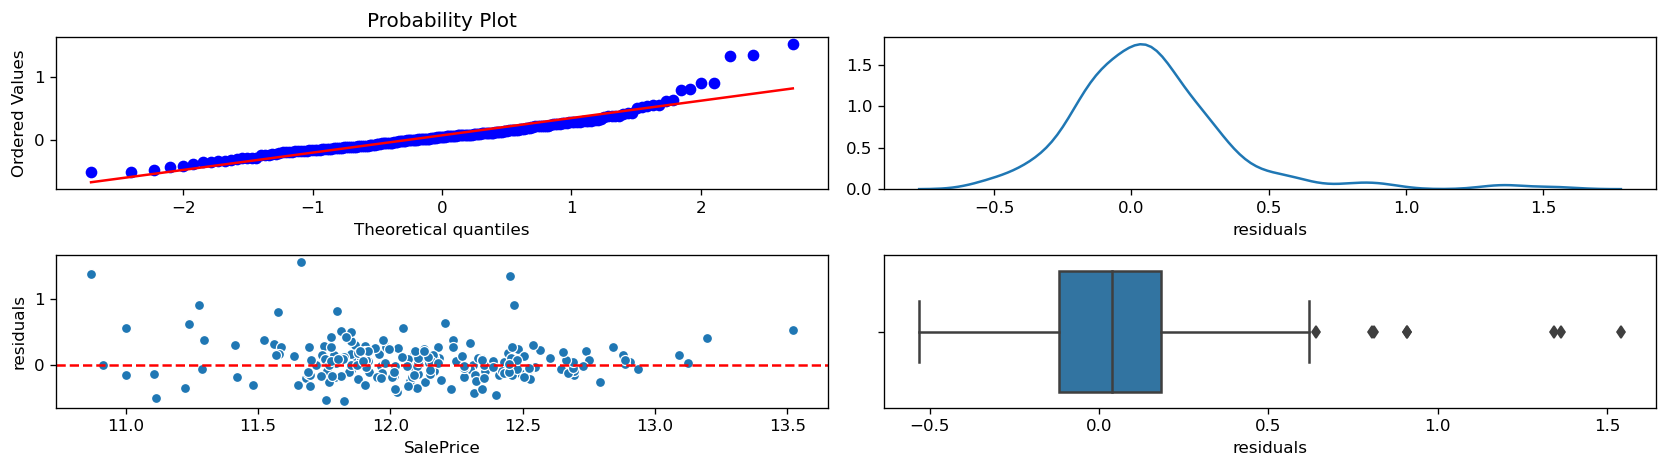

In [75]:
plot_residuals(sgd_y_pred, "SGDRegressor")

**Gradient Boosting Regressor**

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()
gbr_base_mae, gbr_base_rmse, gbr_base_r2score, gbr_y_pred, gbr_model = model_evaluation(gbr_model, 
                                                                                        "GradientBostingRegressor")

**GradientBostingRegressor Metrics**
**MAE: 0.08826770890785023
**RMSE: 0.12497523214678845
**R-squared: 0.92%


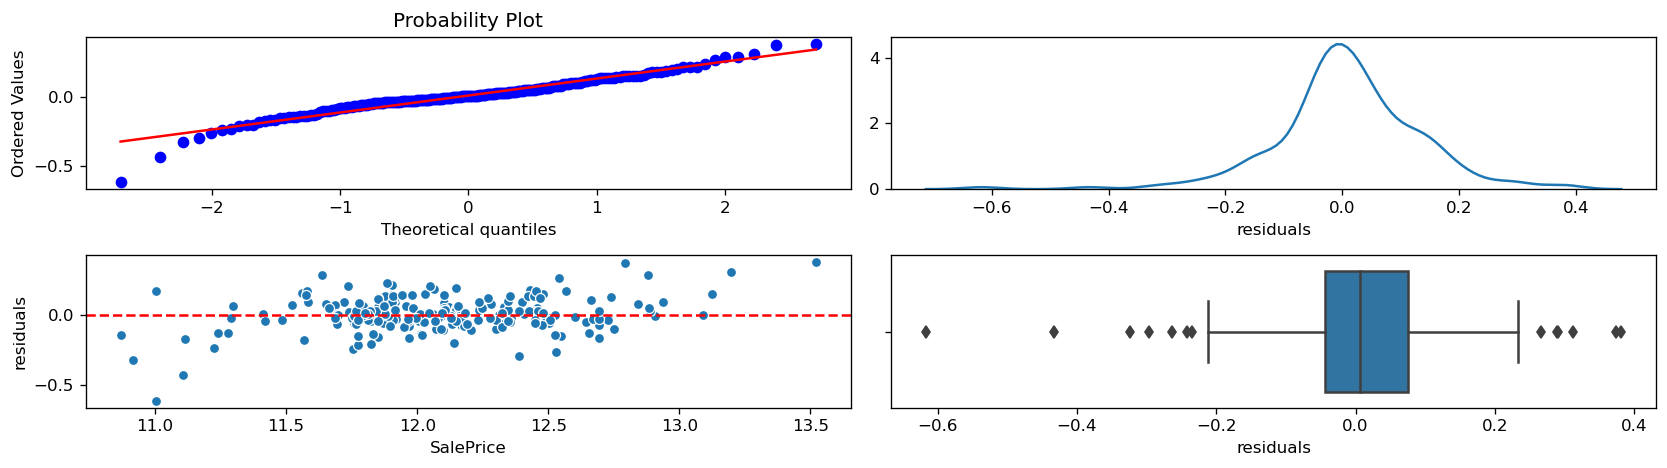

In [77]:
plot_residuals(gbr_y_pred, "Gradient Boosting Regressor")

**Random Forest Regressor**

In [78]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
rfr_base_mae, rfr_base_rmse, rfr_base_r2score, rfr_y_pred, rfr_model = model_evaluation(rfr_model, 
                                                                                        "RandomForestRegressor")

**RandomForestRegressor Metrics**
**MAE: 0.09669011204533029
**RMSE: 0.13893302566413437
**R-squared: 0.90%


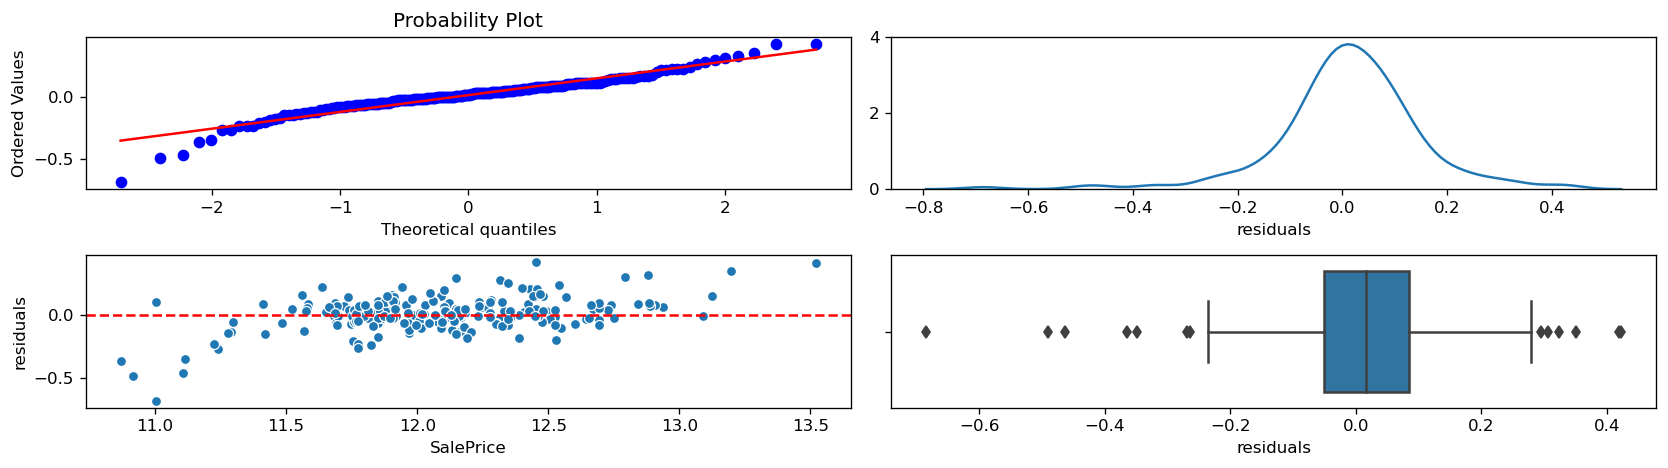

In [79]:
plot_residuals(rfr_y_pred, "Random Forest Regressor")

**Extreme Gradient Boosting**

In [80]:
from xgboost import XGBRegressor

xgboost_model = XGBRegressor()
xgboost_base_mae, xgboost_base_rmse, xgboost_base_r2score, xgboost_y_pred, xgboost_model = model_evaluation(xgboost_model, 
                                                                                                            "Extreme Gradient Boosting")

**Extreme Gradient Boosting Metrics**
**MAE: 0.09806632372151192
**RMSE: 0.1400757022027422
**R-squared: 0.89%


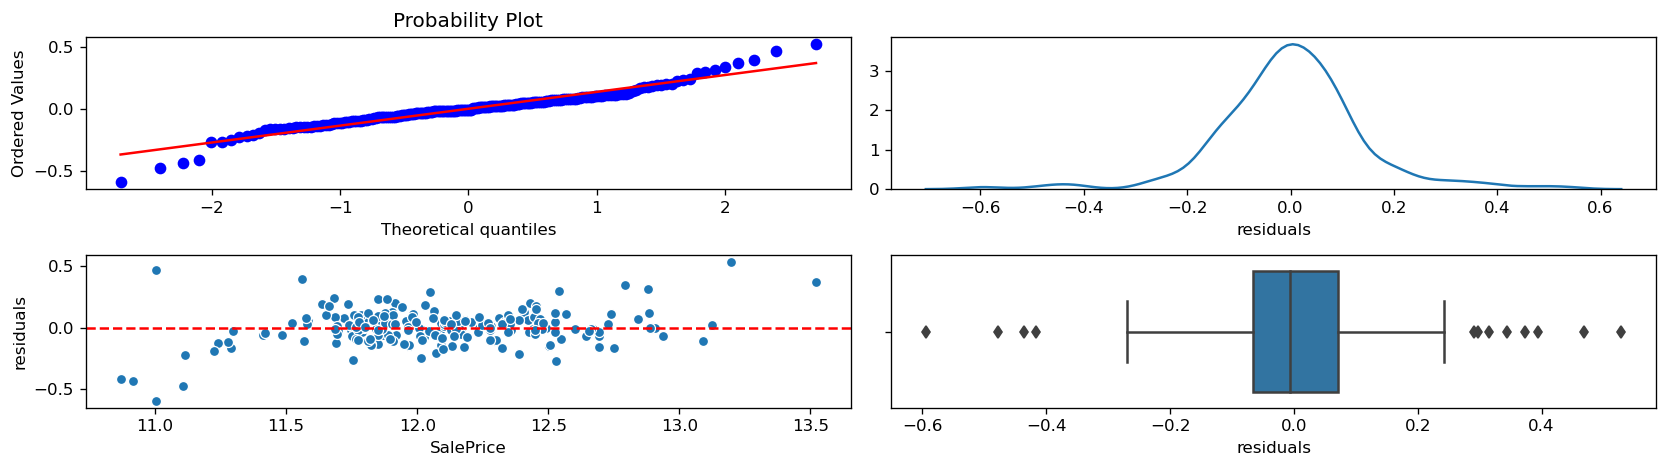

In [81]:
plot_residuals(xgboost_y_pred, "Extreme Gradient Boosting")

**KNeighbors**

In [82]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_base_mae, knn_base_rmse, knn_base_r2score, knn_y_pred, knn_model = model_evaluation(knn_model, 
                                                                                        "KNeighborsRegressor")

**KNeighborsRegressor Metrics**
**MAE: 0.11480490727338094
**RMSE: 0.1533845360426424
**R-squared: 0.87%


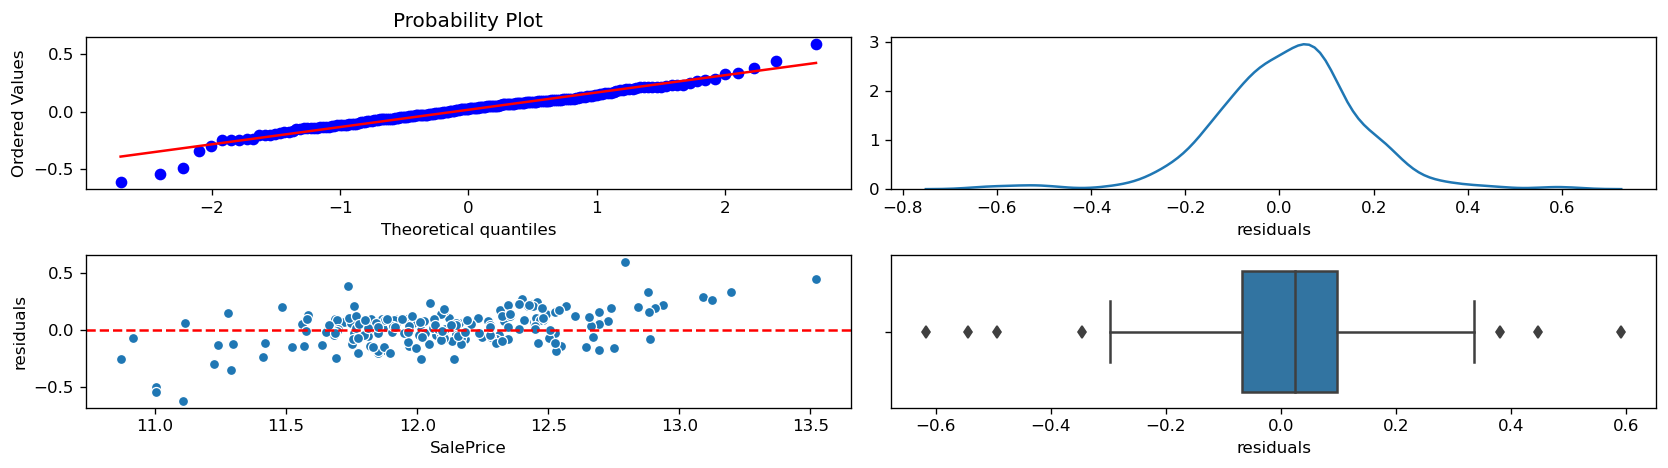

In [83]:
plot_residuals(knn_y_pred, "KNeighborsRegressor")

**Submmit to Kaggle with the best score to Kaggle competition**

In [84]:
# Instantiate StandardScaler and copy dataset
sc = StandardScaler()
scaled_X = X.copy()
scaled_test = clean_test_df.copy()

# Scale the data
scaled_X[num_feat] = sc.fit_transform(X[num_feat])
scaled_test[num_feat] = sc.transform(clean_test_df[num_feat])

# Instantiate the final model
# final_base_model = GradientBoostingRegressor()

# Fit the model
# final_base_model.fit(scaled_X, y)

# final_predictions = final_base_model.predict(scaled_test)


# Make predictions and save it to the dataframe
# final_base_model_df = pd.DataFrame({"id":row_id,
                                    # "SalePrice": np.expm1(final_predictions)})

In [85]:
# final_base_model_df.to_csv("house_price_final_base_sub.csv", index=False)

**ElasticNetCV**

I am going to use ElasticNetCV in the base line models predictions as it will allow me to choose between Ridge(L2 regularization) or Lasso (L1 regularization). The benefit is that elastic net allows a balance of both penalties, which can result in better performance than a model with either one or the other penalty on some problems.

In [86]:
from sklearn.linear_model import ElasticNetCV

elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1])

el_base_mae, el_base_rmse, el_base_r2score, el_base_y_pred, elastic_model = model_evaluation(elastic_model,
                                                                                             "ElasticNetCV")

**ElasticNetCV Metrics**
**MAE: 0.08599360611677288
**RMSE: 0.13473907995239254
**R-squared: 0.90%


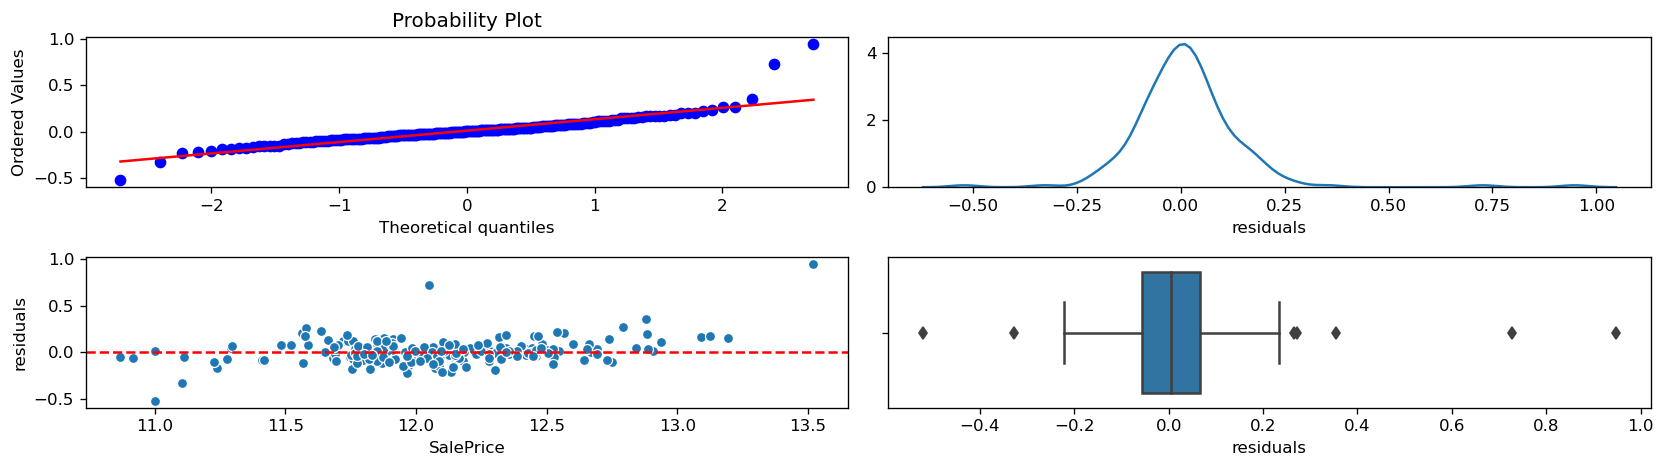

In [87]:
plot_residuals(el_base_y_pred, "ElasticNetCV")

In [88]:
elastic_model.l1_ratio_

0.5

In [89]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(eps=0.01, n_alphas=200, cv=10, max_iter=1000000)


lassoCV_mae, lassoCV_rmse, lassoCV_r2score, lassoCV_y_pred, lasso_cv_model = model_evaluation(lasso_cv_model, "LassoCV")

**LassoCV Metrics**
**MAE: 0.09247418828515297
**RMSE: 0.1270914687641602
**R-squared: 0.91%


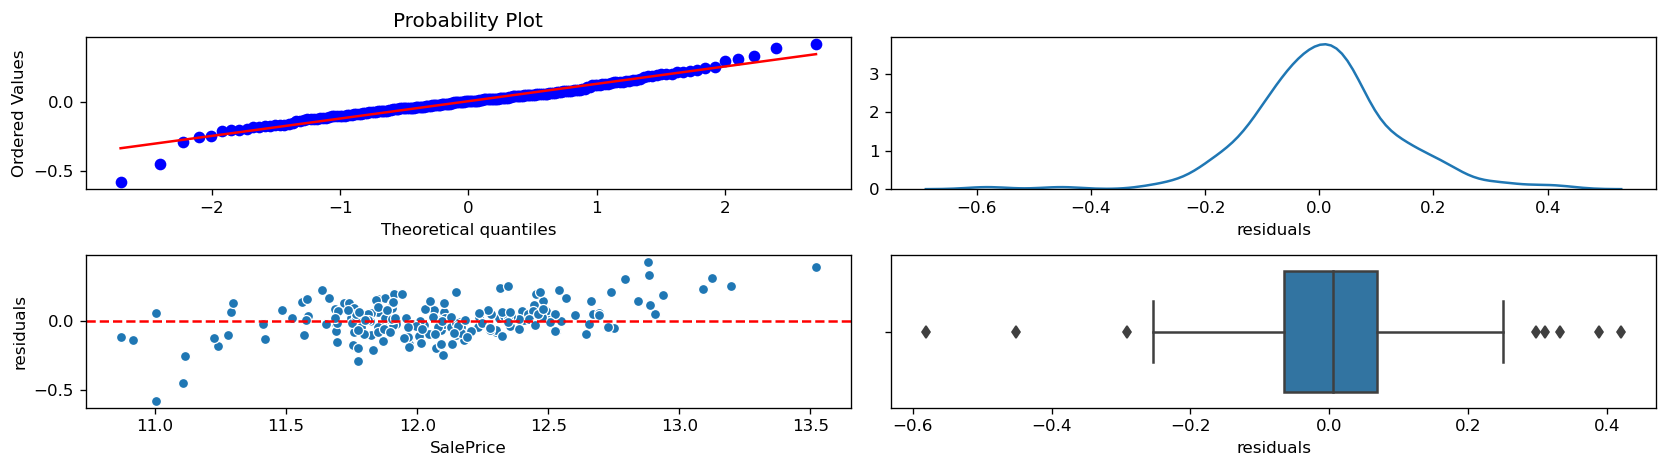

In [90]:
plot_residuals(lassoCV_y_pred, "LassoCV")

**RidgeCV**

In [91]:
from sklearn.linear_model import RidgeCV

ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_cv_mae, ridge_cv_rmse, ridge_cv_r2, ridge_cv_y_pred, ridge_model = model_evaluation(ridge_model,
                                                                                          "RidgeCV")

**RidgeCV Metrics**
**MAE: 0.08142185909981611
**RMSE: 0.11480063176258097
**R-squared: 0.93%


In [92]:
ridge_model.alpha_

10.0

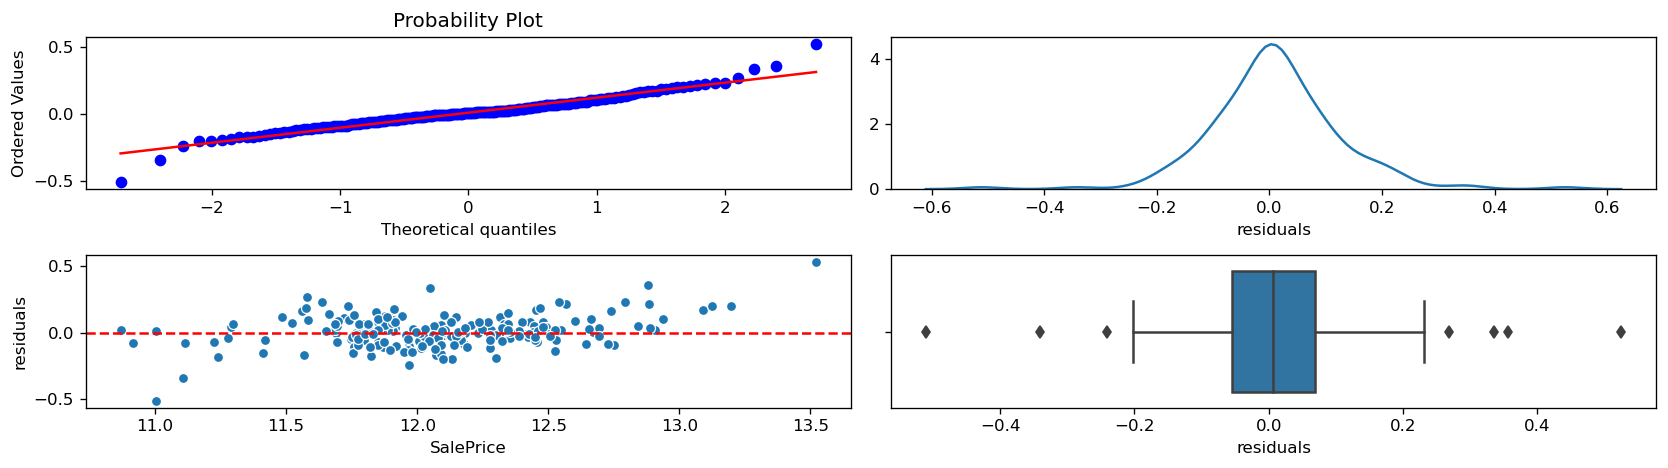

In [93]:
plot_residuals(ridge_cv_y_pred, "RidgeCV")

In [94]:
from sklearn.svm import SVR

svr_base_model = SVR()

svr_base_mae, svr_base_rmse, svr_base_r2score, svr_base_y_red, svr_base_model = model_evaluation(svr_base_model, 
                                                                                                 "Support Vector Regressor")

**Support Vector Regressor Metrics**
**MAE: 0.09033427932388763
**RMSE: 0.13024383649837085
**R-squared: 0.91%


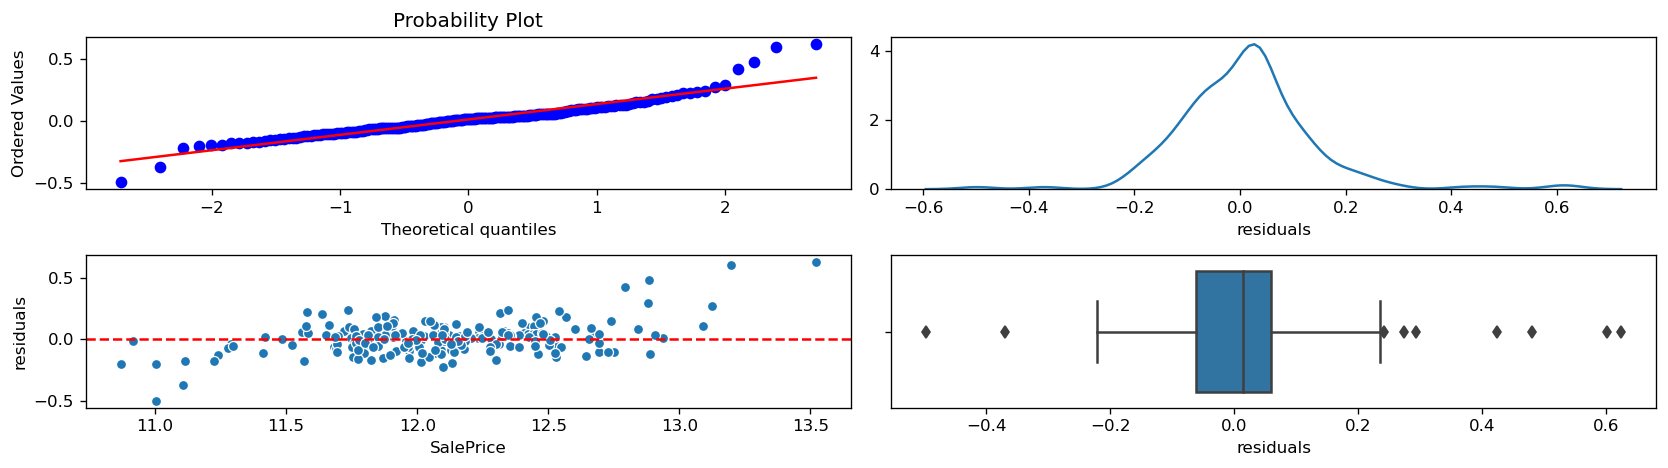

In [95]:
plot_residuals(svr_base_y_red, "SVR")

**CatBoostRegressor**

In [96]:
from catboost import CatBoostRegressor

cat_base = CatBoostRegressor(verbose=0, random_state=101)

cat_base_mae, cat_base_rmse, cat_base_r2, cat_base_y_pred, cat_base_model = model_evaluation(cat_base,
                                                                                             "CatBoostRegressor")

**CatBoostRegressor Metrics**
**MAE: 0.08173493899390946
**RMSE: 0.11657009226160216
**R-squared: 0.93%


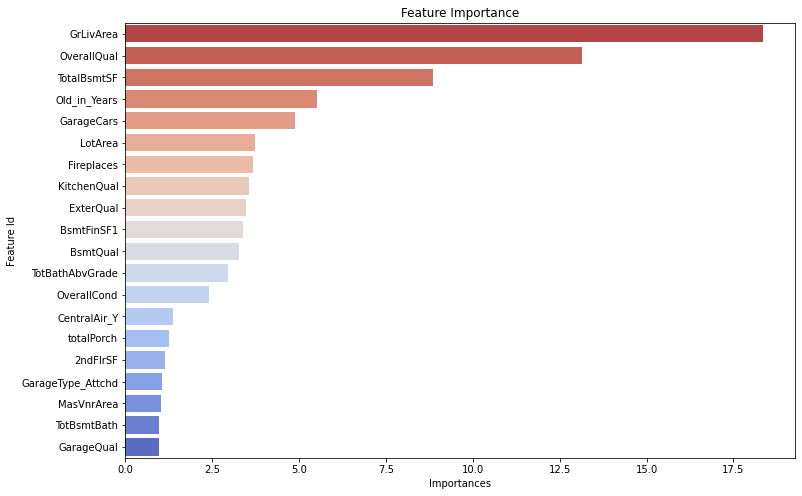

In [97]:
feat_imp = cat_base.get_feature_importance(prettified=True)

# Plotting top 20 features' importance

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:20], orient = 'h', palette="coolwarm_r")
plt.title("Feature Importance")
plt.show()

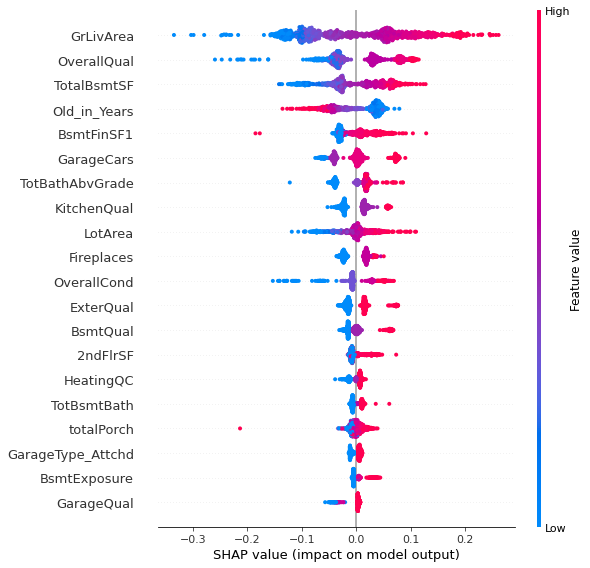

In [98]:
import shap
from catboost import Pool

# Feature importance Interactive Plot 

train_pool = Pool(scaled_Xtrain)
val_pool = Pool(scaled_Xtest)

explainer = shap.TreeExplainer(cat_base_model) # insert your model
shap_values = explainer.shap_values(train_pool) # insert your train Pool object

shap.summary_plot(shap_values, scaled_Xtrain)

### Base model scores metrics

In [99]:
base_score_df = pd.DataFrame({"Model":["SGDRegressor", "GradientBoostingRegressor",
                                       "RandomForestRegressor", "Extreme Gradient Boosting",
                                       "KNeighborsRegressor" , "LassoCV", "SVR", "RidgeCV",
                                       "CatBoost"],
                              
                              "R-square":[sgd_base_r2score, gbr_base_r2score, rfr_base_r2score,
                                         xgboost_base_r2score, knn_base_r2score, lassoCV_r2score,
                                         svr_base_r2score, ridge_cv_r2, cat_base_r2],
                              
                              "RMSE":[sgd_base_rmse, gbr_base_rmse, rfr_base_rmse, xgboost_base_rmse,
                                      knn_base_rmse, lassoCV_rmse, svr_base_rmse, ridge_cv_rmse,
                                      cat_base_rmse],
                              
                              "MAE": [sgd_base_mae, gbr_base_mae, rfr_base_mae, xgboost_base_mae,
                                      knn_base_mae, lassoCV_mae, svr_base_mae, ridge_cv_mae,
                                      cat_base_mae]})

base_score_df = base_score_df.sort_values(by=["R-square"], 
                                          ascending=False).reset_index(drop=True)

In [100]:
print("**Base Models Metrics**")
base_score_df

**Base Models Metrics**


,Model,R-square,RMSE,MAE
0,RidgeCV,0.928598,0.114801,0.081422
1,CatBoost,0.926380,0.116570,0.081735
2,GradientBoostingRegressor,0.915381,0.124975,0.088268
3,LassoCV,0.912491,0.127091,0.092474
4,SVR,0.908096,0.130244,0.090334
5,RandomForestRegressor,0.895424,0.138933,0.096690
6,Extreme Gradient Boosting,0.893697,0.140076,0.098066
7,KNeighborsRegressor,0.872537,0.153385,0.114805
8,SGDRegressor,0.508987,0.301048,0.204180


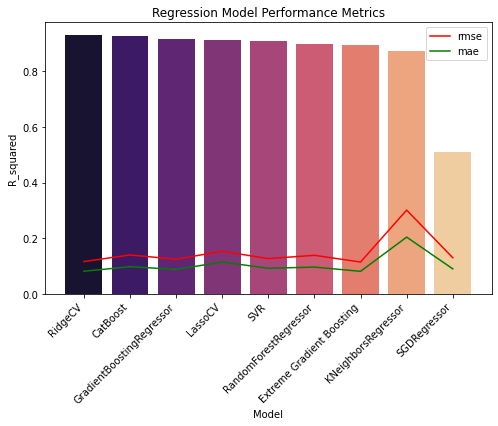

In [101]:
# Visualize the table above
fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x="Model", y="R-square", data=base_score_df, ax=ax, palette="magma")
sns.lineplot(x="Model", y="RMSE", data=base_score_df, color="red", ax=ax,legend='brief', label="rmse")
sns.lineplot(x="Model", y="MAE", data=base_score_df, color='green', ax=ax, legend='brief', label="mae")

plt.xticks(rotation=45, horizontalalignment="right")
plt.title("Regression Model Performance Metrics")
plt.ylabel("R_squared")
plt.legend();

#### Submmit Voting Ensamble Model with base models

In [102]:
from sklearn.ensemble import VotingRegressor

ensemble1_model = VotingRegressor(estimators=[("ridgecv", ridge_model),
                                             ("catboost", cat_base_model),
                                             ("gbr", gbr_model),
                                             ("lassocv", lasso_cv_model),
                                             ("svr", svr_base_model),
                                             ("forest", rfr_model)])

In [103]:
ensemble1_mae, ensemble1_rmse, ensemble1_r2, _ , ensemble1_model = model_evaluation(ensemble1_model,
                                                                                    "Voting Regressor")

**Voting Regressor Metrics**
**MAE: 0.08109442091995282
**RMSE: 0.11493763874837686
**R-squared: 0.93%


**Submmit ensemble model to the competition**

In [104]:
# Fit the model
# ensemble_model1.fit(scaled_X, y)

# final_ensemble = ensemble_model1.predict(scaled_test)


# Make predictions and save it to the dataframe
# final_base_ensemble_df = pd.DataFrame({"id":row_id,
                                       # "SalePrice": np.expm1(final_ensemble)})

In [105]:
# final_base_ensemble_df.to_csv("house_price_final_ensemble_base_sub.csv", index=False)

### GridSearchCV for the best hyperparameters

GridSearchCV is a exhaustive search over specified hyperparameters values for an estimator. It allow us to find the best combination of best parameters for a chosen model. I will split data again with test size of 0.1.

In [106]:
from sklearn.model_selection import GridSearchCV

def model_gridsearchCV(algo,param,name):
    """
    Function will perform gridsearchCV for given algorithm
    and parameter grid. Returns grid model, y_pred. Prints out 
    mean absolute error, root mean squared error, R-square score
    """
    # Instatiate base model
    model = algo()
    
    # Instantiate grid for a model
    model_grid = GridSearchCV(model, 
                             param,
                             scoring="r2",
                             # verbose=2,
                             n_jobs=-1,
                             cv=3)
    # Fit the grid model
    model_grid.fit(scaled_Xtrain, y_train)
    
    # Make prediction
    y_pred = model_grid.predict(scaled_Xtest)
    
    # Evaluate model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2score = r2_score(y_test, y_pred)
    
    # Print 
    print(f"**{name} with GridSearchCV**")
    print(f"MAE: {mae:}")
    print(f"RMSE: {rmse:}")
    print(f"R-squared: {r2score:.2f}%")
    
    return mae, rmse, r2score, y_pred, model_grid

**GradientBoostingRegressor**

In [123]:
param_grid = {#"loss":["ls","lad","huber","quantile"],
              "learning_rate": [ 0.01, 0.1, 0.3, 1],
              "subsample": [0.5, 0.2, 0.1],
              "n_estimators": [500, 1000],
              "max_depth": [3,6,8]}

gbr_grid_mae, gbr_grid_rmse, gbr_grid_r2, _ , gbr_grid = model_gridsearchCV(GradientBoostingRegressor, 
                                                                            param_grid,
                                                                            "GradientBoostingRegressor")

**GradientBoostingRegressor with GridSearchCV**
MAE: 0.07959359343696733
RMSE: 0.11485898367543942
R-squared: 0.93%


In [124]:
gbr_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.1}

**Random Forest Regressor**

In [109]:
param_grid = {"n_estimators": [500,1000, 1500],
              "max_features": ['auto','sqrt'],
              "max_depth": [None,5,10,],
              "min_samples_split": [2,5,10],
              "min_samples_leaf": [1,2,5,10]}

rfr_grid_mae, rfr_grid_rmse, rfr_grid_r2, _ , rfr_grid_model = model_gridsearchCV(RandomForestRegressor,
                                                                                  param_grid,
                                                                                  "RandomForestRegressor")

**RandomForestRegressor with GridSearchCV**
MAE: 0.09754685415811341
RMSE: 0.13868638606094943
R-squared: 0.90%


In [110]:
rfr_grid_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

**SVR**

In [111]:
param_grid = {"kernel":["linear","rbf",],
              "gamma": ["scale","auto"],
              "C": [0.1, 0.5, 1, 10],
              "epsilon": [0.1, 0.01, 0.001]}

svr_grid_mae, svr_grid_rmse, svr_grid_r2, svr_grid_y_pred, svr_grid_model = model_gridsearchCV(SVR,
                                                                                param_grid,
                                                                               "SVR")

**SVR with GridSearchCV**
MAE: 0.07506689083186811
RMSE: 0.10511601108775911
R-squared: 0.94%


In [112]:
svr_grid_model.best_params_

{'C': 1, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}

In [113]:
svr_grid_model.best_score_

0.8907066770463427

**Ridge**

RidgeCV had the best metrics and I want to see if GridSearchCV can improve the model.

In [114]:
from sklearn.linear_model import Ridge

param_grid = {"solver": ["auto","svd","lsqr","saga"],
              "max_iter": [1000, 10000],
              "tol": [1e-3,1e-2],
              "alpha": [0.1, 1.0, 10.0, 30.0]}

ridge_gr_mae, ridge_gr_rmse, ridge_gr_r2,_ , ridge_gr_model = model_gridsearchCV(Ridge,
                                                                                 param_grid,
                                                                                 "Ridge")

**Ridge with GridSearchCV**
MAE: 0.08142185909981926
RMSE: 0.11480063176257987
R-squared: 0.93%


In [115]:
ridge_gr_model.best_params_

{'alpha': 10.0, 'max_iter': 1000, 'solver': 'auto', 'tol': 0.001}

**Extreme Gradient Boosting**

There is a warning when running this algoritm, but It should not prevent your code from running, nor should it lead to different results.

In [116]:
param_grid = {"learning_rate":[0.05, 0.10, 0.15, 0.20, 0.30],
              "max_depth":[3,4,5,6,8,15],
              "min_child_weight":[1,3,5,7],
              "gamma":[0.0, 0.1, 0.2, 0.3, 0.4],
              "colsample_bytree":[0.3, 0.4, 0.5, 0.7]}

xboost_gr_mae, xboost_gr_rmse, xboost_gr_r2, _ , xboost_gr_model = model_gridsearchCV(XGBRegressor,
                                                                                      param_grid,
                                                                                      "XGBoost")

**XGBoost with GridSearchCV**
MAE: 0.086323728889195
RMSE: 0.12089097079723686
R-squared: 0.92%


In [117]:
xboost_gr_model.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 3}

**CatBoostRegressor**

In [125]:
#param_grid = {'iterations': [250,100,500,1000],
              #'learning_rate': [0.01,0.1,0.2,0.3],
              #'depth': [4, 6],
              #'l2_leaf_reg': [3,1,5,10,100]}


# cat_grid_mae, cat_grid_rmse, cat_grid_r2, _ , cat_grid_model = model_gridsearchCV(CatBoostRegressor,
                                                                                  # param_grid,
                                                                                  # "CatBoost")

**CatBoost with GridSearchCV**
1. MAE: 0.08686650731538992
2. RMSE: 0.12366782337837257
3. R-squared: 0.92%

In [126]:
cat_grid_model.best_params_

{'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.01}

In [127]:
grCV_metrics_df = pd.DataFrame({"Model":["GradientBoostingRegressor", "RandomForestRegressor", 
                                         "SVR", "Ridge", "XGBRegressor", "CatBoost"],
                                        
                                "R-square":[gbr_grid_r2, rfr_grid_r2, svr_grid_r2, 
                                            ridge_gr_r2, xboost_gr_r2, cat_grid_r2],
                                        
                                "RMSE":[gbr_grid_rmse, rfr_grid_rmse, svr_grid_rmse, 
                                        ridge_gr_rmse, xboost_gr_rmse, cat_grid_rmse],
                                        
                                "MAE":[gbr_grid_mae, rfr_grid_mae, svr_grid_mae, 
                                      ridge_gr_mae, xboost_gr_mae, cat_grid_mae]})

grCV_mertics_df = grCV_metrics_df.sort_values(by=["R-square"],
                                              ascending=False).reset_index(drop=True)

print("**GridSearchCV Models Metrics**")
grCV_mertics_df

**GridSearchCV Models Metrics**


,Model,R-square,RMSE,MAE
0,SVR,0.940137,0.105116,0.075067
1,Ridge,0.928598,0.114801,0.081422
2,GradientBoostingRegressor,0.928525,0.114859,0.079594
3,XGBRegressor,0.920821,0.120891,0.086324
4,CatBoost,0.917142,0.123668,0.086867
5,RandomForestRegressor,0.895795,0.138686,0.097547


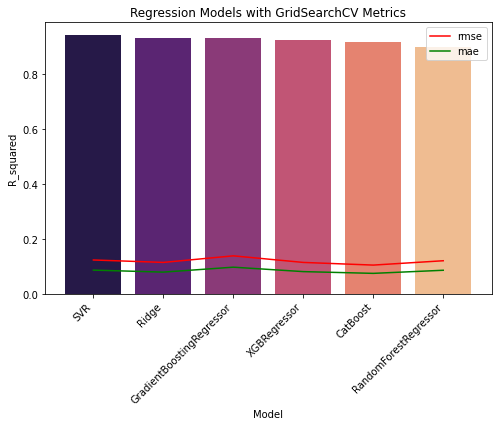

In [128]:
# Visualize the table above
fig, ax = plt.subplots(figsize=(8,5))

list_order = list(grCV_mertics_df['Model'].values)
# R-squared
sns.barplot(x="Model", y="R-square", 
            data=grCV_metrics_df, ax=ax, 
            palette="magma", order= list_order)
# Root Mean Squared Error
sns.lineplot(x="Model", y="RMSE", data=grCV_metrics_df, 
             color="red", ax=ax,legend='brief', label="rmse")
# Mean Absolute Error
sns.lineplot(x="Model", y="MAE", data=grCV_metrics_df, 
             color='green', ax=ax, legend='brief', label="mae")

plt.xticks(rotation=45, horizontalalignment="right")
plt.title("Regression Models with GridSearchCV Metrics")
plt.ylabel("R_squared")
plt.legend();

###  Ensemble model with best parameters

In [179]:
ensemble2_model = VotingRegressor(estimators=[("ridgecv", ridge_gr_model.estimator),
                                             ("catboost", cat_grid_model.estimator),
                                             ("gbr", gbr_grid.estimator),
                                             ("lassocv", lasso_cv_model),
                                             ("svr", svr_base_model),
                                             ("forest", rfr_model.base_estimator)])

In [193]:
# Fit the model
# ensemble2_model.fit(scaled_Xtrain, y_train)

In [185]:
# Evaluate ensemble model
ensemble2_y_pred = ensemble2_model.predict(scaled_Xtest)

ensemble2_mae = mean_absolute_error(y_test, ensemble2_y_pred)
ensemble2_rmse = np.sqrt(mean_squared_error(y_test, ensemble2_y_pred))
    
# R-squared 
ensemble2_r2 = r2_score(y_test, ensemble2_y_pred)
    
print(f"**VotingRegressor Metrics**")
print(f"**MAE: {ensemble2_mae}")
print(f"**RMSE: {ensemble2_rmse}")
print(f"**R-squared: {ensemble2_r2:.2f}%")

**VotingRegressor Metrics**
**MAE: 0.08485512276627909
**RMSE: 0.12073327729796185
**R-squared: 0.92%


### Make predictions submmision to Kaggle

In [186]:
best_ensemble = VotingRegressor(estimators=[("gbr", gbr_grid.estimator),
                                            ("forest", rfr_grid_model.estimator),
                                            ("svr", svr_grid_model.estimator),
                                            ("ridge", ridge_gr_model.estimator),
                                            ("xgboost", xboost_gr_model.estimator),
                                            ("catboost", cat_grid_model.estimator)])

In [191]:
#fit the model
#best_ensemble.fit(scaled_X, y)

#final_ensemble2 = best_ensemble.predict(scaled_test)


#Make predictions and save it to the dataframe
#final_ensemble_df = pd.DataFrame({"id":row_id,"SalePrice": np.expm1(final_ensemble2)})

In [192]:
final_ensemble_df.to_csv("house_price_grid_ensemble_sub.csv", index=False)

I have to admit that spent all that time on testing didn't help to improve the model in this case .After submmision to Kaggle competition I end up in top 8%. Now, I need to figure it out what to do next or which techniques I could implement to make this model even more robust. I've got some ideas already in my mind, anyway, back to reading and searching. So, if you Kagglers have some ideas let me know. Don't forget to leave feadback.